# UCI ML Datasets - Boston Housing Dataset - Regression with 93% ACC


### Attribute Information:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 Dollars
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000's

For more information about the dataset use the following Kaggle link: <br>
https://www.kaggle.com/datasets/heptapod/uci-ml-datasets

## Import Libraries and Load Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
df=pd.read_csv("HousingData.csv")

## EDA - Exploratory Data Analysis

In [3]:
df.head() #first 5 entries

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info() # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum() # checking for missing values

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

We have a total of 506 entries with 14 columns of information and some missing values.

In [6]:
df.describe() # statistical infos of the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.corr() # the correlation between the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


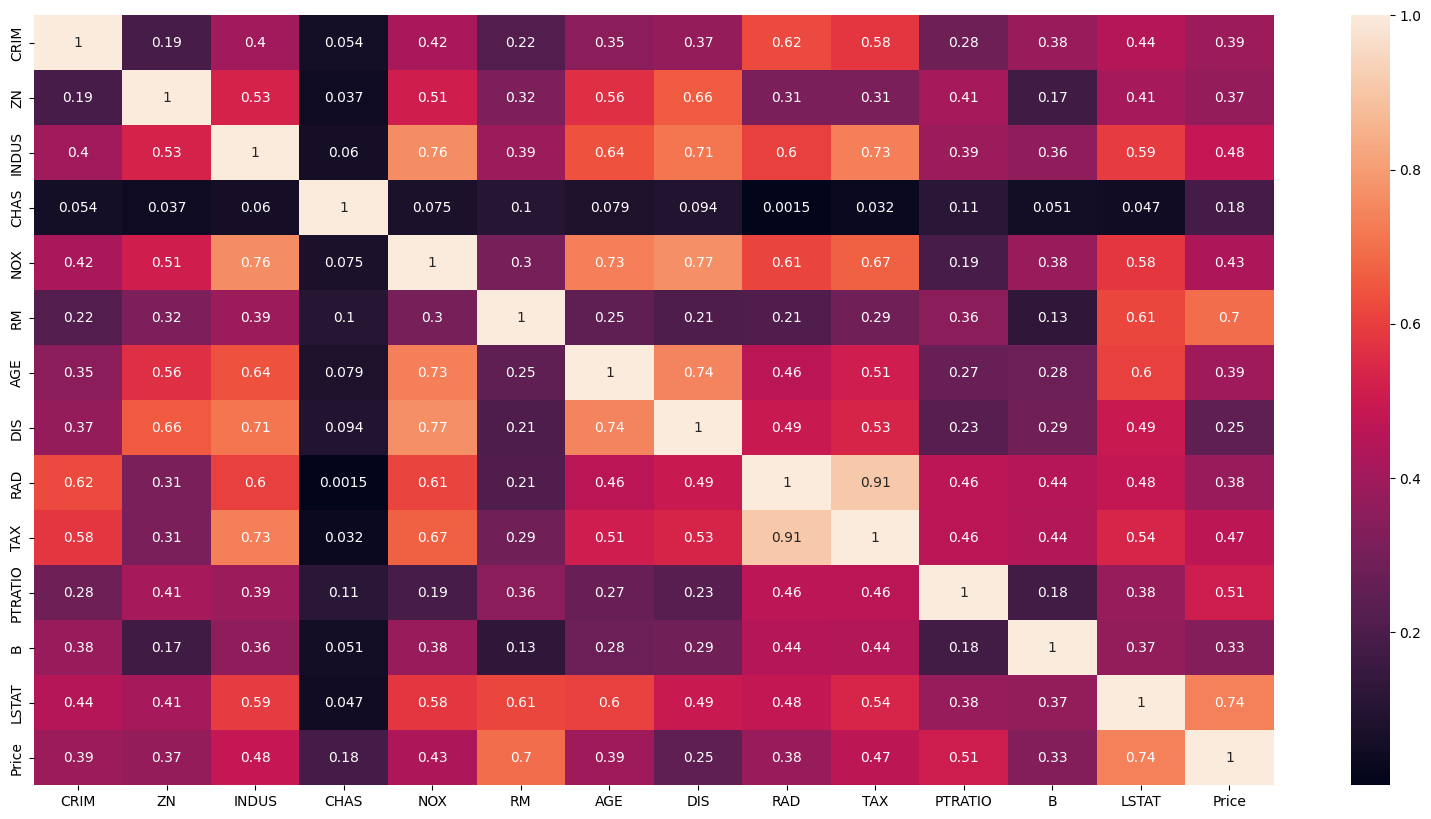

In [8]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True);

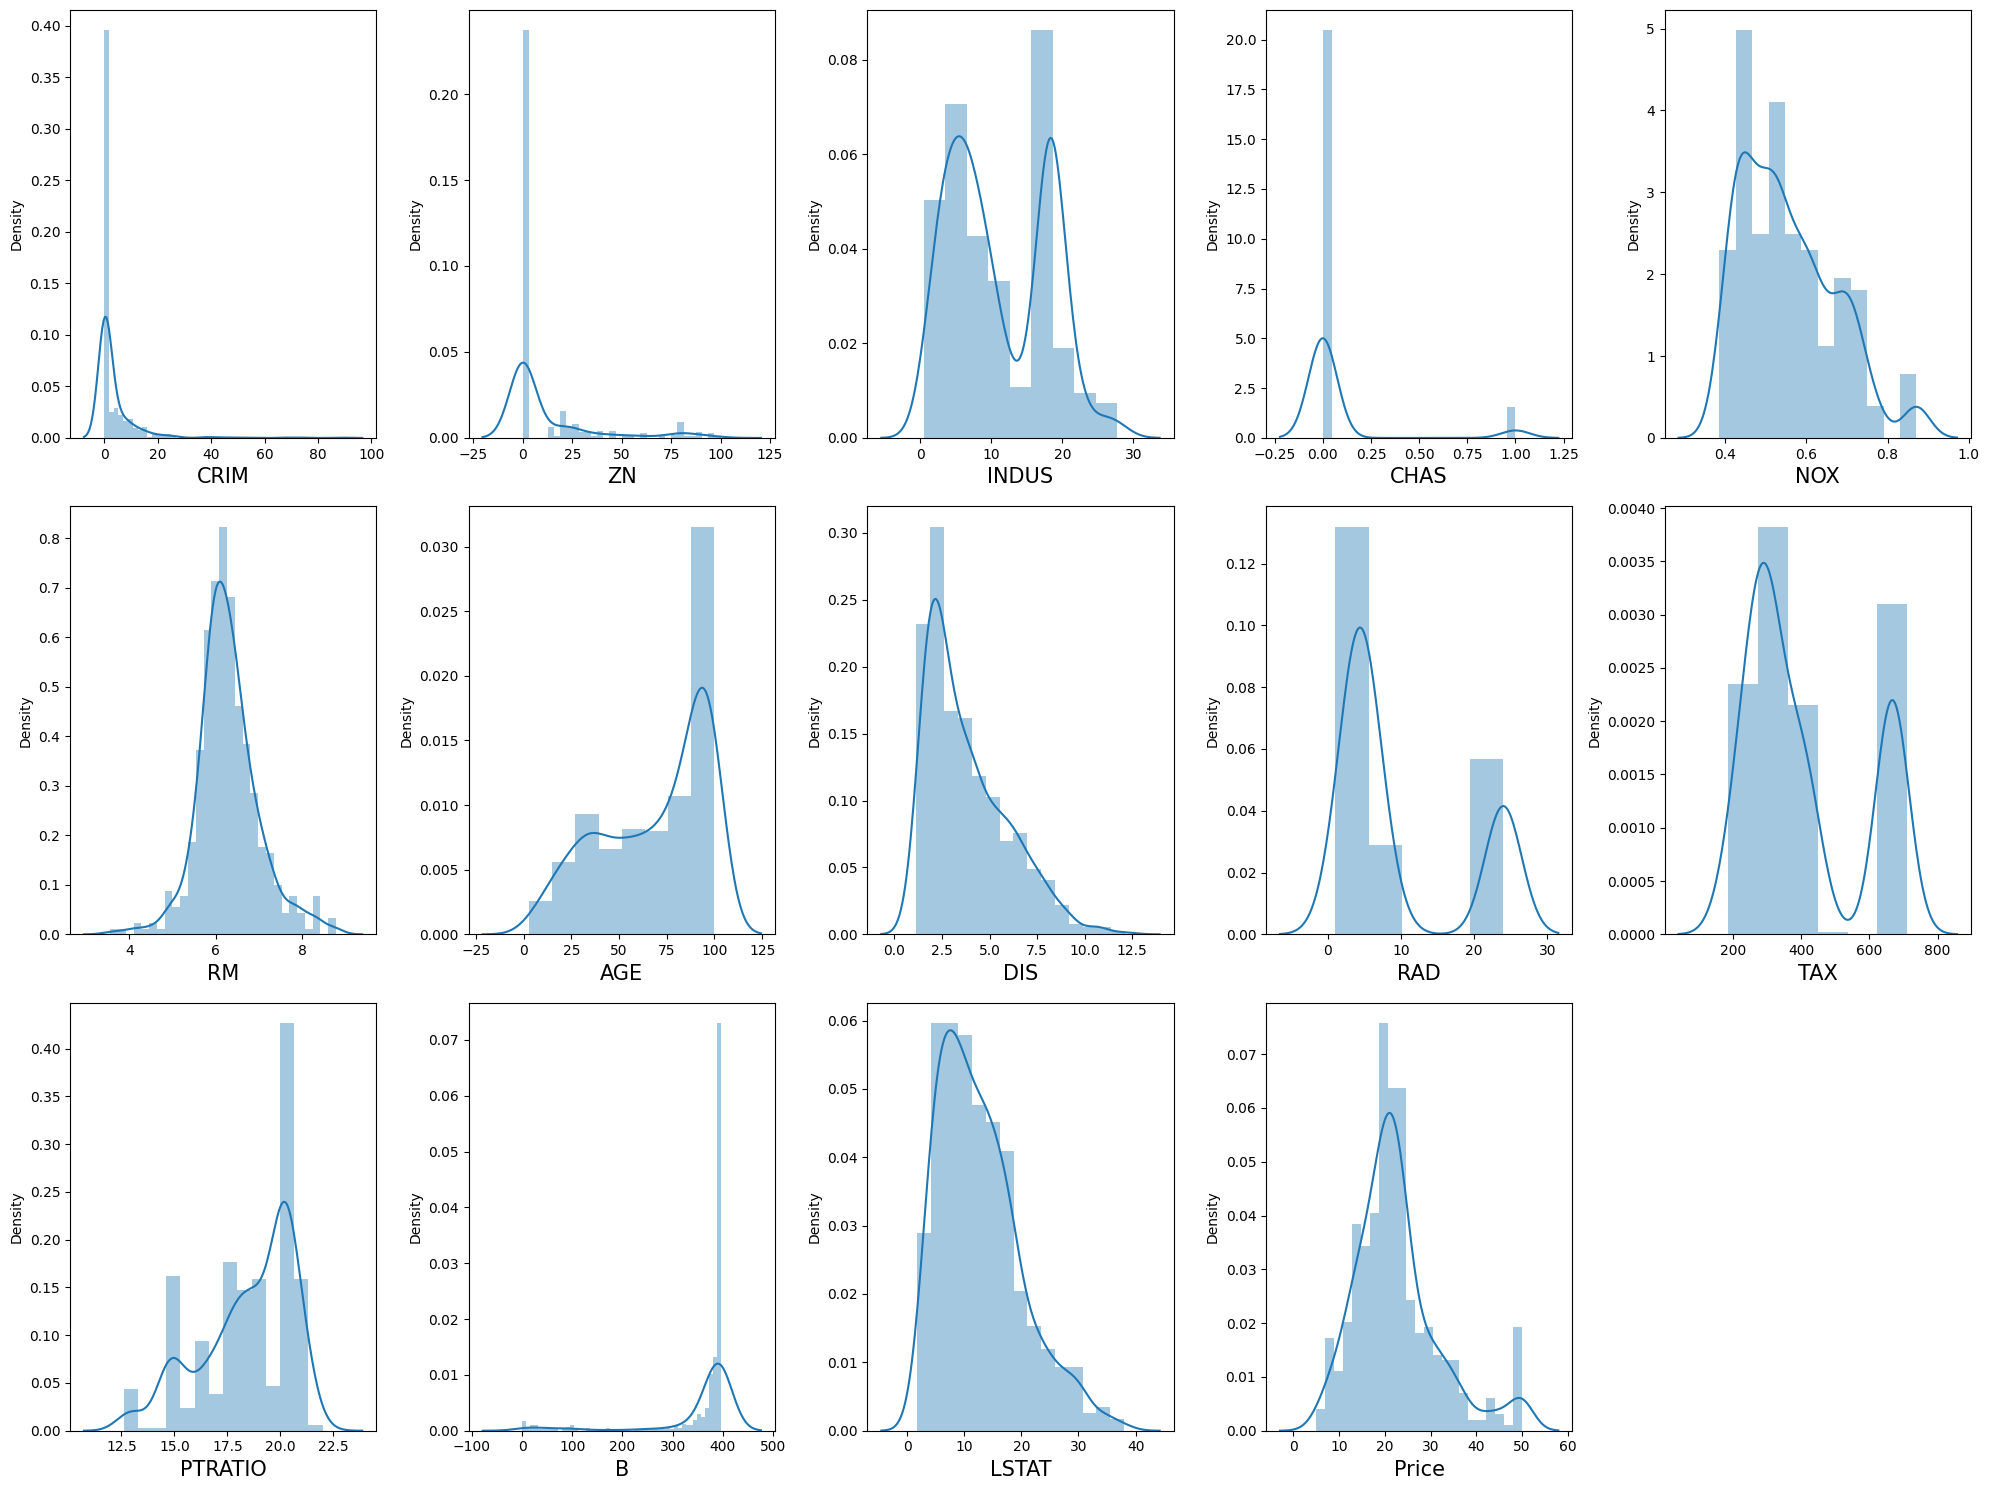

In [9]:
# Let's see how data is distributed for every column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

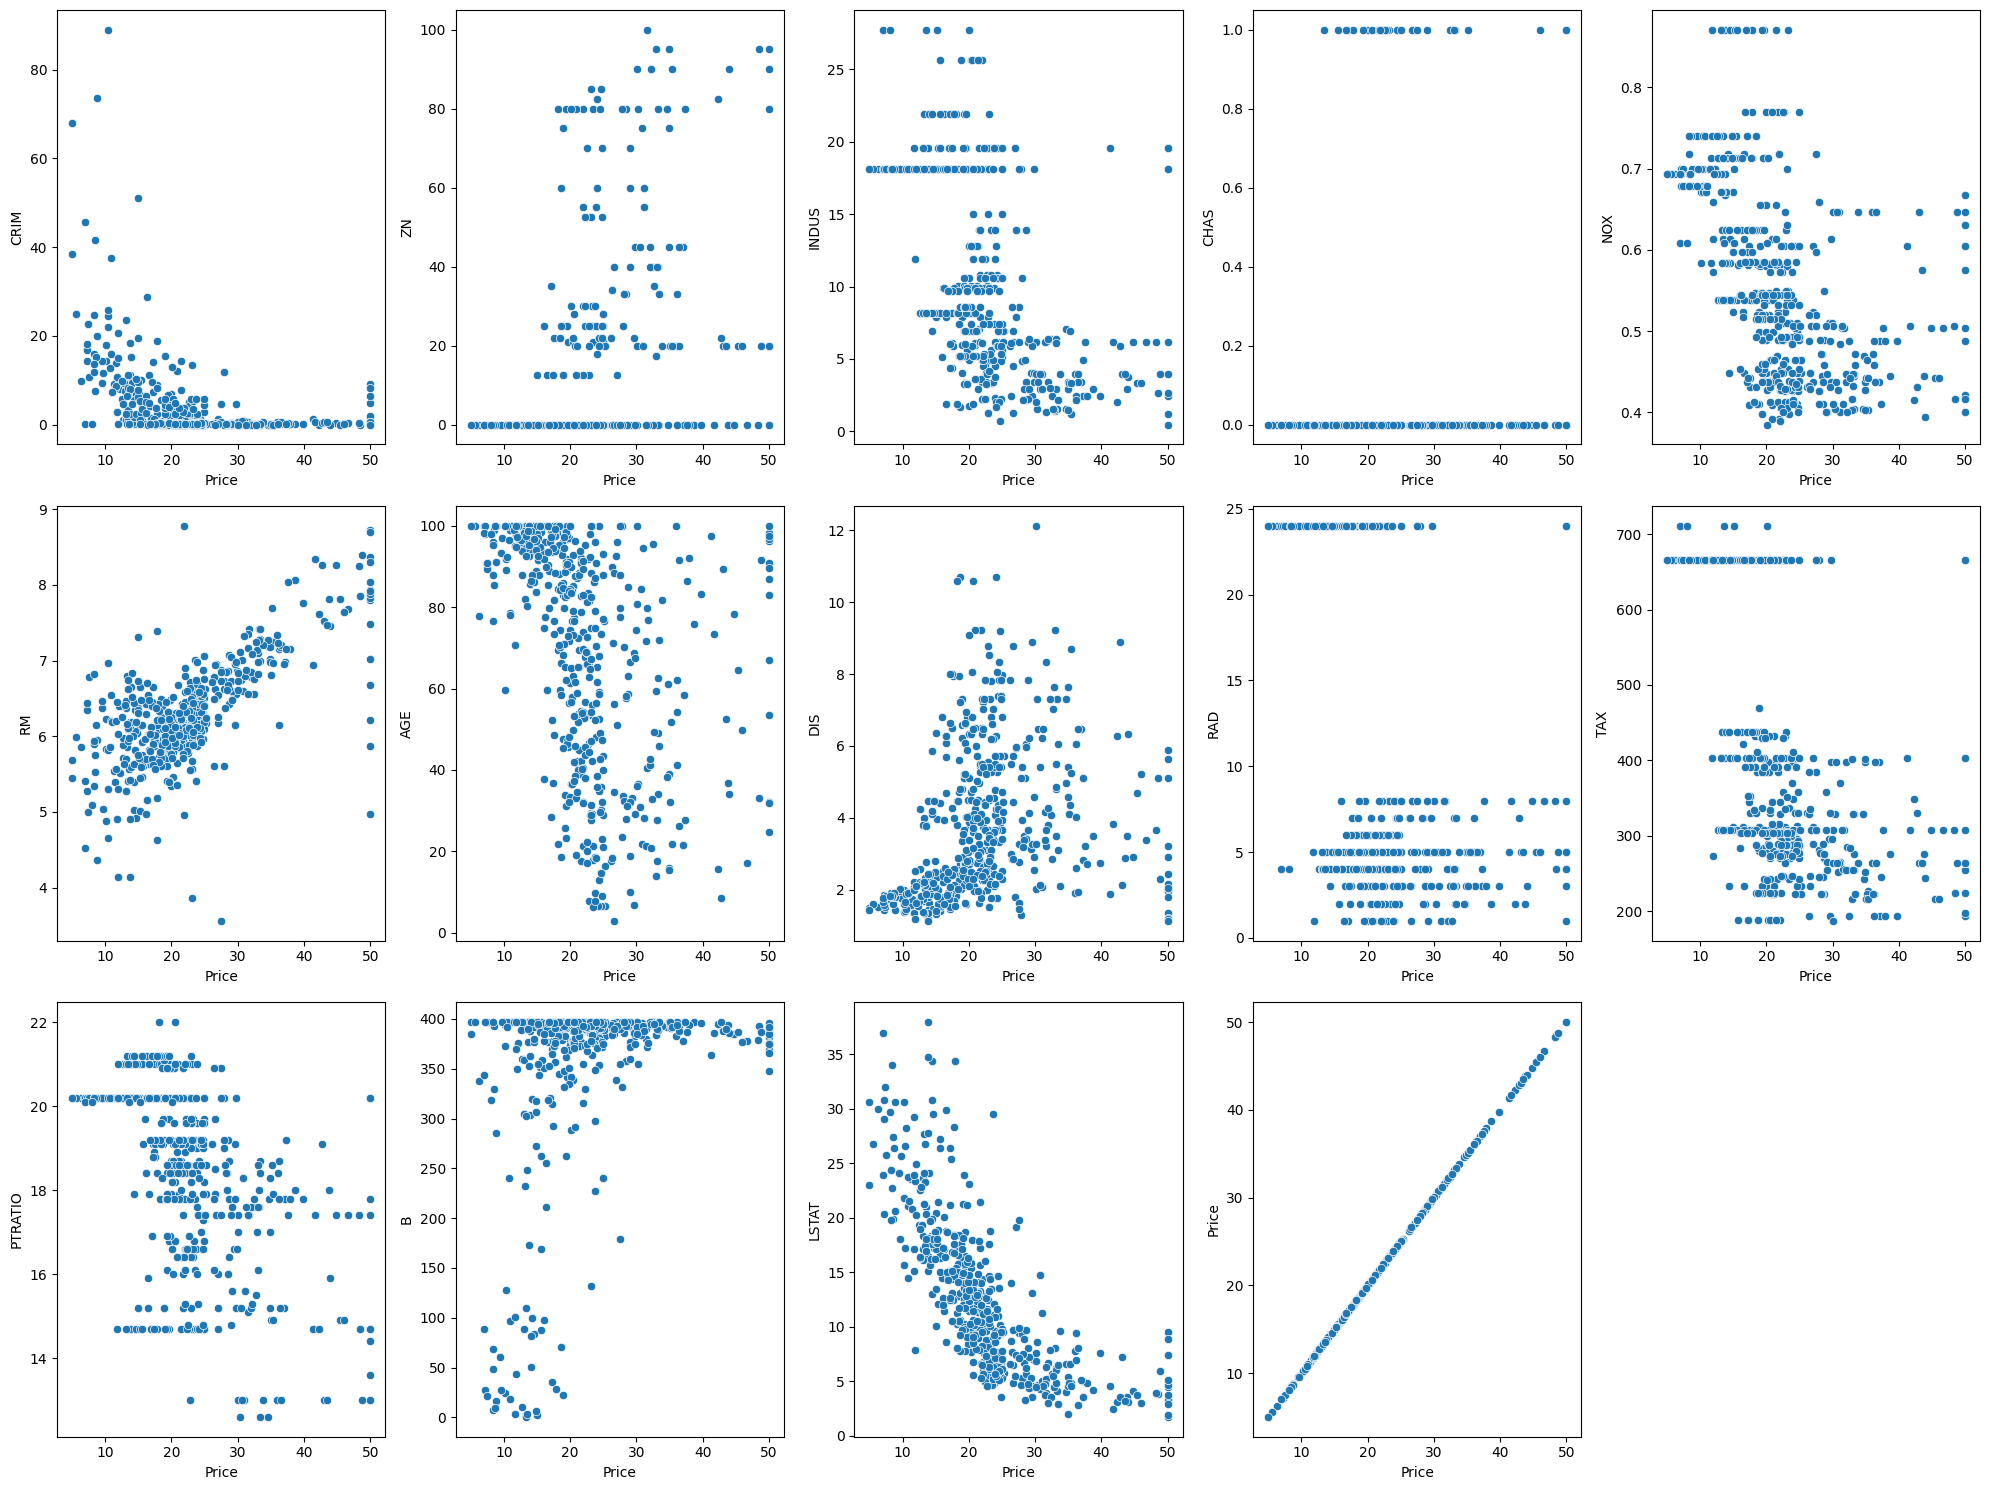

In [10]:
# Plotting `Price` with remaining columns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['Price'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Data Visualization

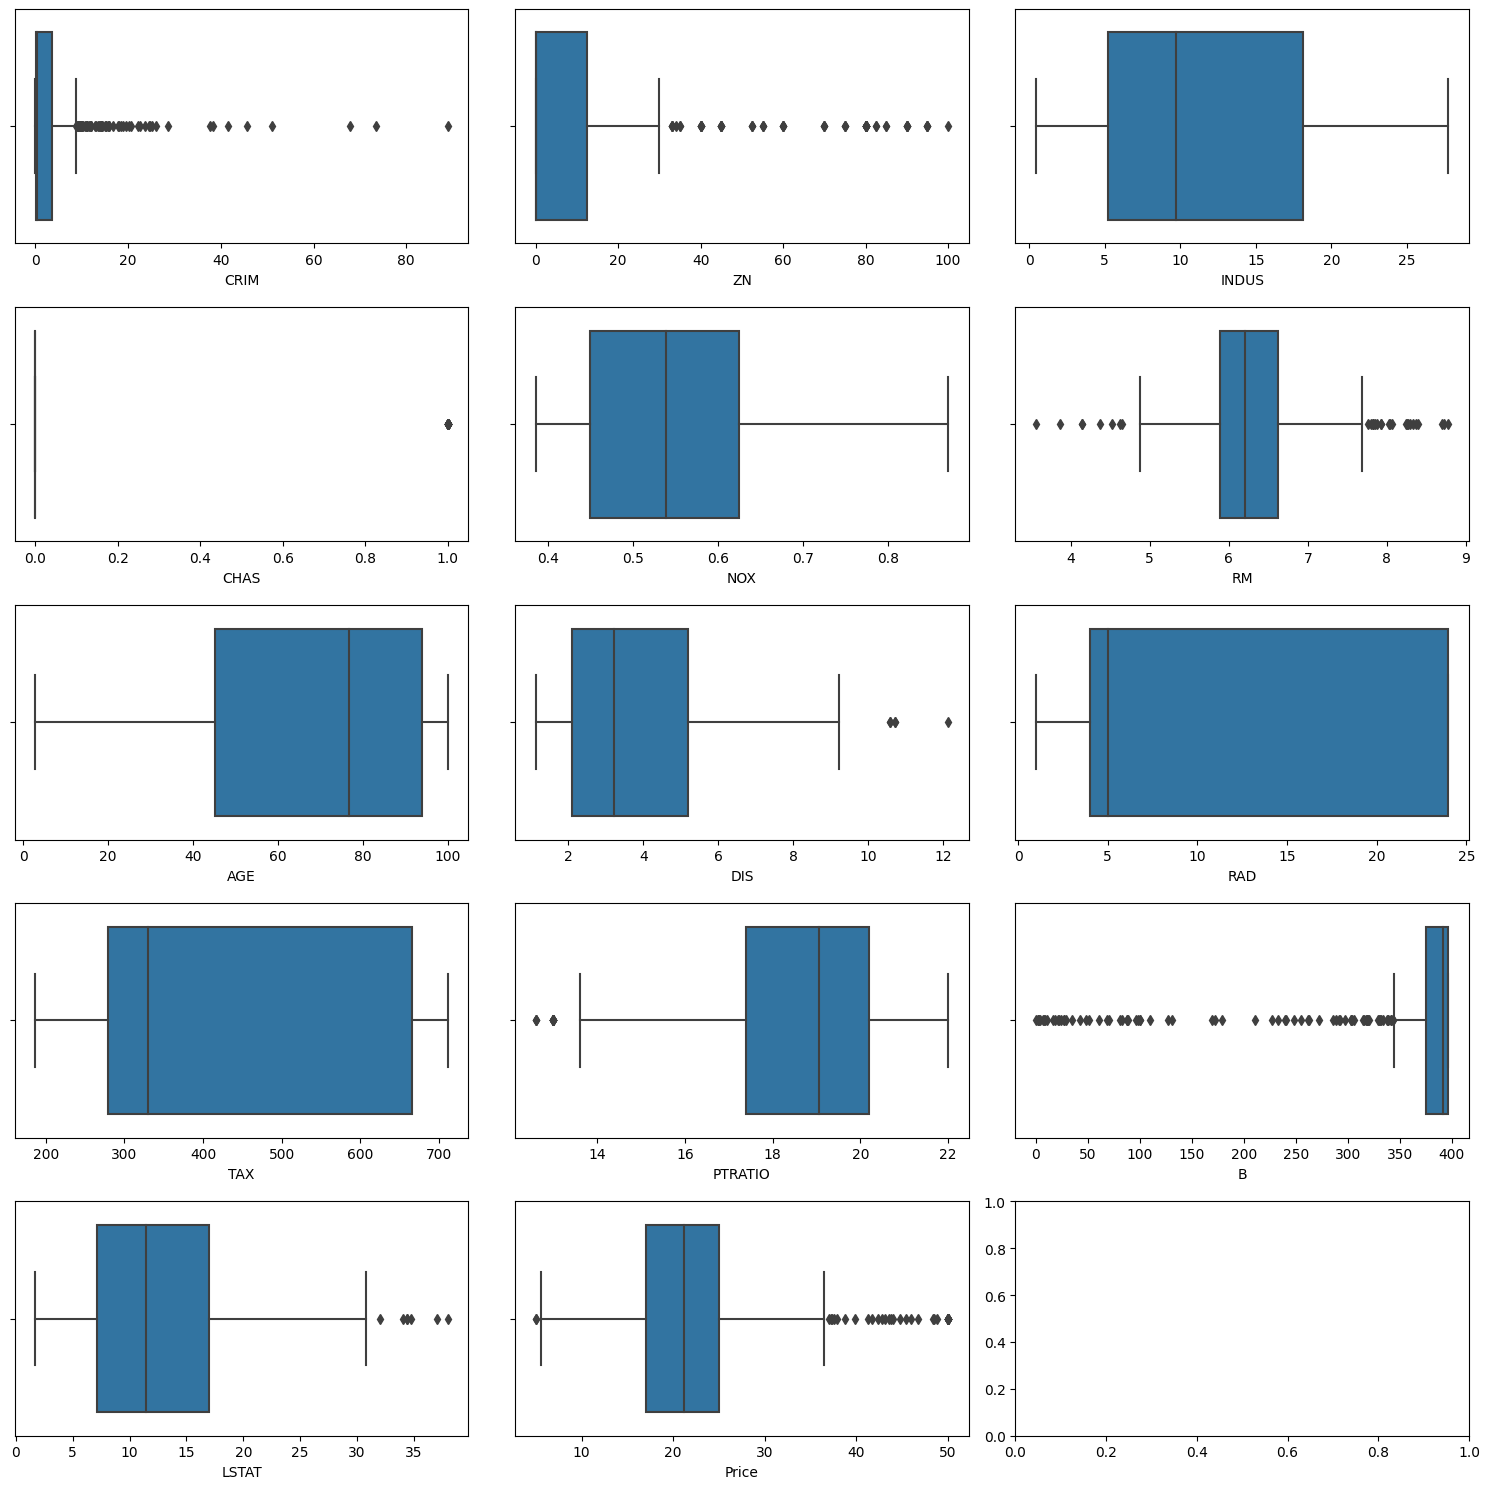

In [11]:
# Create a figure and a set of subplots with as many rows as needed and 3 columns
num_rows = (len(df.columns) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

Through these boxplots we can see that we have outliers and we have to deal with them.

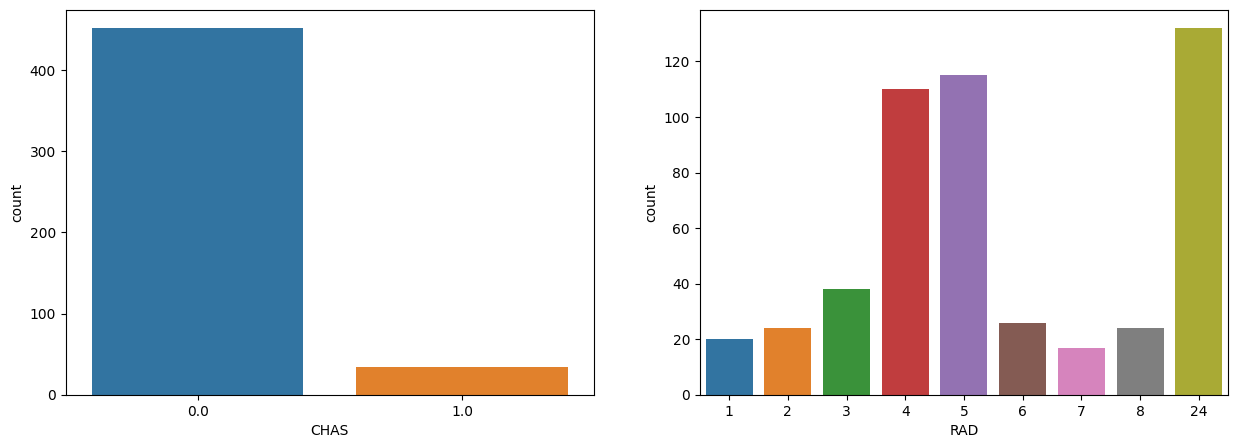

In [12]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.countplot(x=df['CHAS']);
fig.add_subplot(1, 2, 2)
sns.countplot(x=df['RAD']);

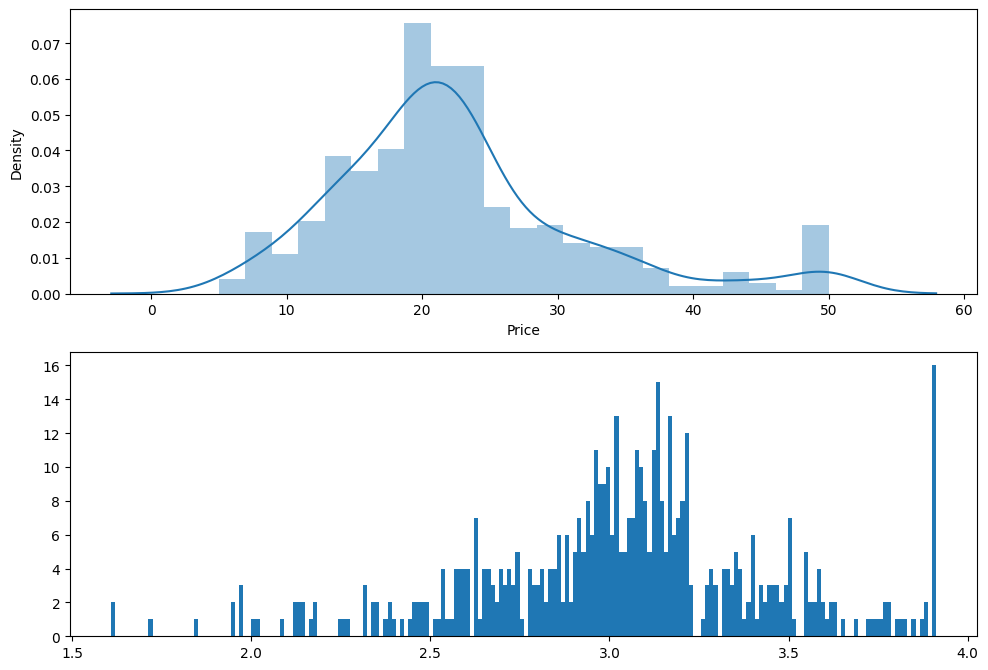

In [13]:
fig = plt.figure(figsize=(10,10)) # plotting the MEDV in different forms
fig.add_subplot(3,1,1)
sns.distplot(df['Price'])
fig.add_subplot(3,1,2)
plt.hist((np.log(df.Price)), bins=200);
plt.tight_layout();

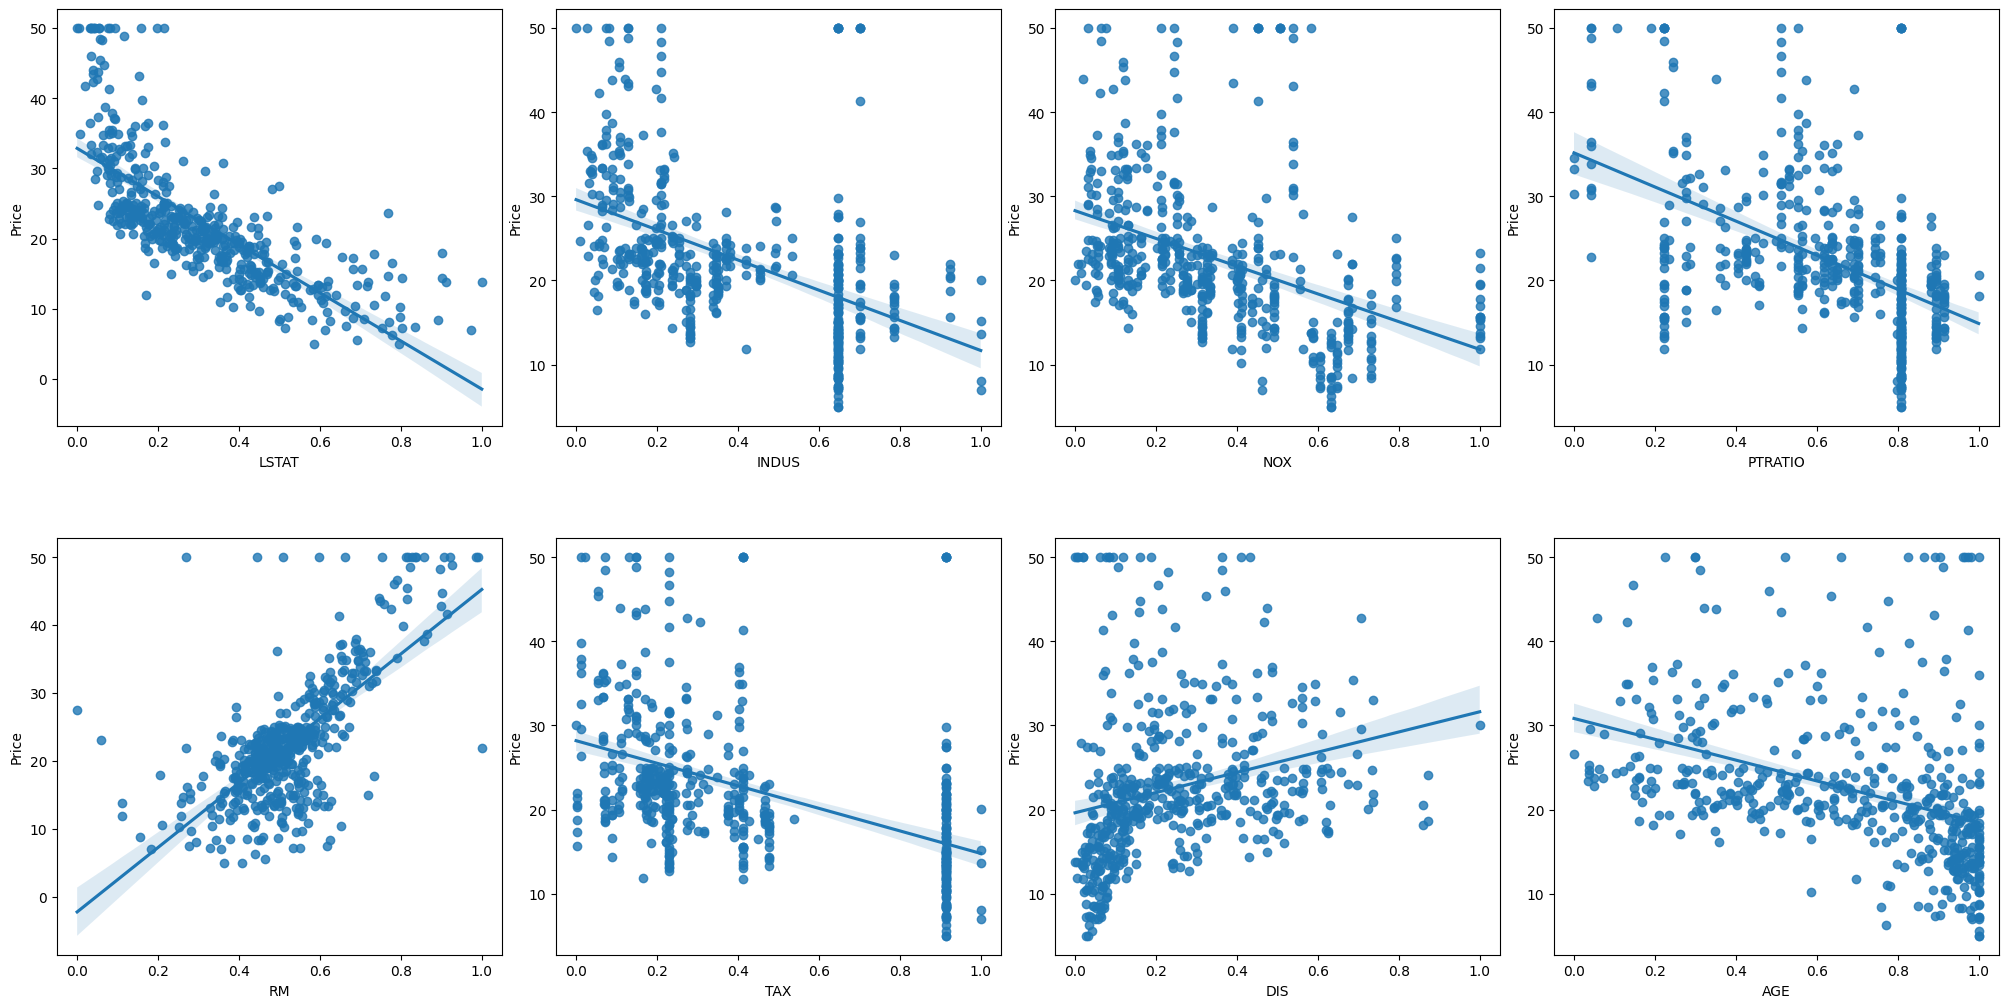

In [14]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['Price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: xlabel='RM', ylabel='Price'>

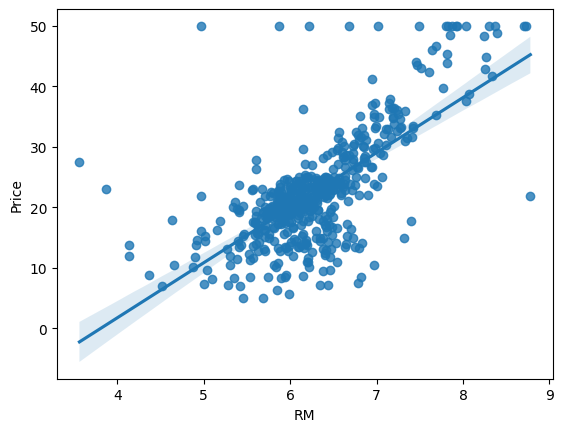

In [15]:
sns.regplot(x='RM', y='Price', data = df)

<Axes: xlabel='LSTAT', ylabel='Price'>

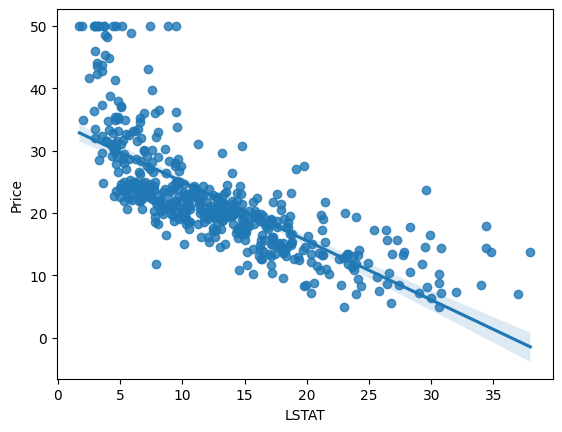

In [16]:
sns.regplot(x='LSTAT', y='Price', data = df)

<Axes: xlabel='CHAS', ylabel='Price'>

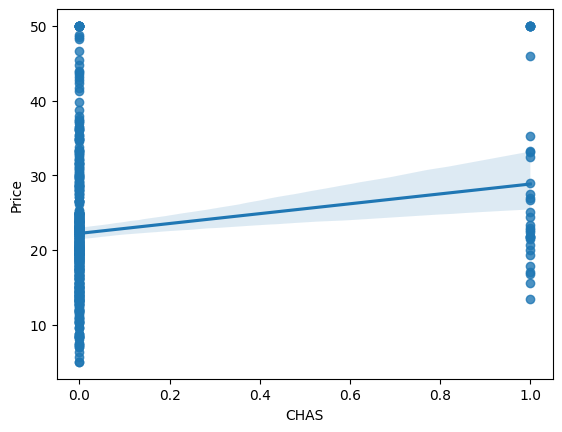

In [17]:
sns.regplot(x='CHAS', y='Price', data = df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

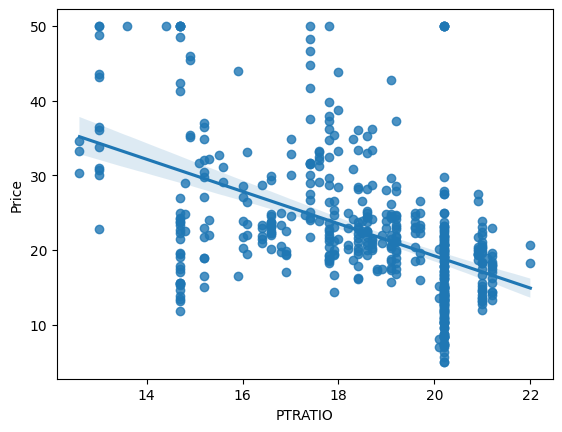

In [18]:
sns.regplot(x='PTRATIO', y='Price', data = df)

<Axes: xlabel='CRIM', ylabel='Price'>

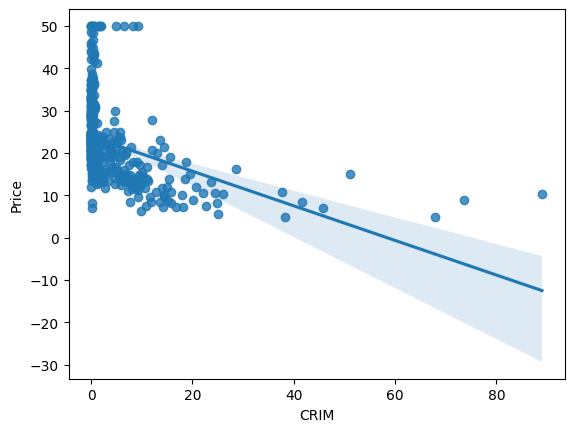

In [19]:
sns.regplot(x='CRIM', y='Price', data = df)

## Missing Value Treatment

We are filling missing values with mean or mode values of each missing column.

In [20]:
df["CRIM"].fillna(df["CRIM"].mean(), inplace=True) # fill CRIM with mean value
df["ZN"].fillna(0, inplace=True) # fill ZN with mode value, because 360 of the entries are 0
df["INDUS"].fillna(df["INDUS"].mean(), inplace=True) # fill INDUS with mean value
df["CHAS"].fillna(0, inplace=True) # fill CHAS with mode value, because 452 of the entries are 0
df["AGE"].fillna(df["AGE"].mean(), inplace=True) # fill AGE with mean value
df["LSTAT"].fillna(df["LSTAT"].mean(), inplace=True) # fill LSTAT with mean value

In [21]:
df.isnull().sum() # no more missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Outlier Treatment

In [22]:
outliers = df.quantile(.97) # dealing with the outliers seen in the boxplots above
df = df[(df['CRIM']<outliers['CRIM'])]
df = df[(df['ZN']<outliers['ZN'])]
df = df[(df['RM']<outliers['RM'])]
df = df[(df['DIS']<outliers['DIS'])]
df = df[(df['PTRATIO']<outliers['PTRATIO'])]
df = df[(df['B']<outliers['B'])]
df = df[(df['LSTAT']<outliers['LSTAT'])]

In [23]:
# see how the other columns are correlated with MEDV (Median value of owner-occupied homes in $1000's)
abs(df.corr()["Price"].sort_values(ascending=False))

Price      1.000000
RM         0.547155
B          0.410849
ZN         0.288001
CHAS       0.227926
DIS        0.138795
RAD        0.280554
AGE        0.301971
NOX        0.331190
TAX        0.359319
CRIM       0.360421
INDUS      0.368039
PTRATIO    0.410473
LSTAT      0.731104
Name: Price, dtype: float64

With this our results got only worse, so I restarted without using feature engineering.

## MODELING

In [24]:
# Function to call all Regression Algorithms
def regression_funct(x,y):
    #importing Regression libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    # split the data in Train and Test 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    XGBC= XGBRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN,XGBC]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor','XGBRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names) # create df with results
    
    for item in algos: # fit and predict model with all algos and append the results in their lists
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [25]:
x,y=df.drop("Price",axis=1),df[["Price"]] # Assign x and y

In [26]:
regression_funct(x,y) # call regression function and see results in a Dataframe

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.931458,2.004803,1.606083
XGBRegressor,0.911645,2.276202,1.858557
Ridge,0.751404,3.818047,2.815662
LinearRegression,0.742709,3.884251,2.928353
ElasticNet,0.741159,3.895930,2.866464
Lasso,0.733467,3.953396,2.910935
ExtraTreeRegressor,0.676710,4.354026,2.984615
KNeighborsRegressor,0.407491,5.894431,4.269846


The best result shows the **GradientBoostingRegressor with 93% accuracy** and **RMSE of 2, MAE of 1.6** followd by XGBRRegressor with 91% and RidgeRegression with 75% 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [28]:
# split the data in Train and Test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
GBR = GradientBoostingRegressor()
GBR_model = GBR.fit(x_train,y_train)

In [30]:
GBR_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [31]:
GBR_model_pred = GBR_model.predict(x_test)

In [32]:
GBR_model_pred

array([30.45005202, 36.48914488, 26.22542224, 21.79992828, 39.08645785,
       29.51410455, 24.45757296, 23.37587217, 16.19124481, 20.60924915,
       24.70569249, 19.84989825, 13.33468731, 20.74613129, 34.41837467,
       17.49687489, 23.47604852, 19.36582547, 15.10446577, 17.00338853,
       23.26253341, 26.06642414, 21.66377932, 13.638776  , 20.83522634,
       20.92149732, 21.87795378, 24.03015328, 28.93818881,  8.14555058,
       46.18030748, 20.73671712, 26.0326783 , 19.77564741, 14.28406447,
       34.63768947, 16.22338497, 23.30319736, 22.44096841, 19.25635747,
       14.44121291, 22.54422484,  9.62793507, 13.65761407, 24.08317724,
       16.08246156, 21.60598238, 14.47274833, 15.58719304, 17.68056002,
       18.35415381, 18.3019471 , 28.66122274, 19.73933089, 11.90006704,
       12.58209386, 21.40682439, 20.88441615, 18.49123277, 20.67123673,
       20.66064905, 23.14546969, 13.66137051, 11.22543794, 24.01638492])

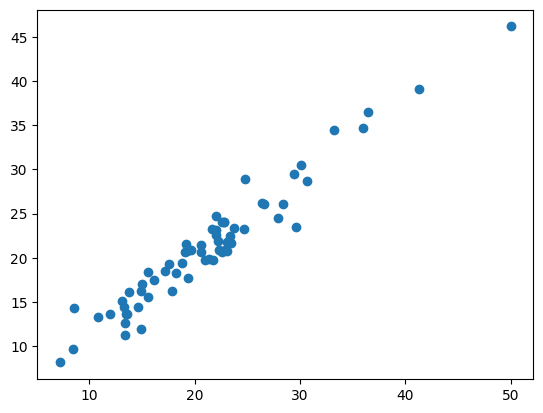

In [33]:
plt.scatter(y_test, GBR_model_pred)

In [34]:
GBR_model_pred=GBR_model_pred.reshape(65,1)
residuals = y_test-GBR_model_pred

In [35]:
residuals

,Price
259,-0.350052
192,-0.089145
302,0.174578
16,1.300072
157,2.213542
...,...
359,1.939351
91,-1.145470
457,-0.161371
423,2.174562


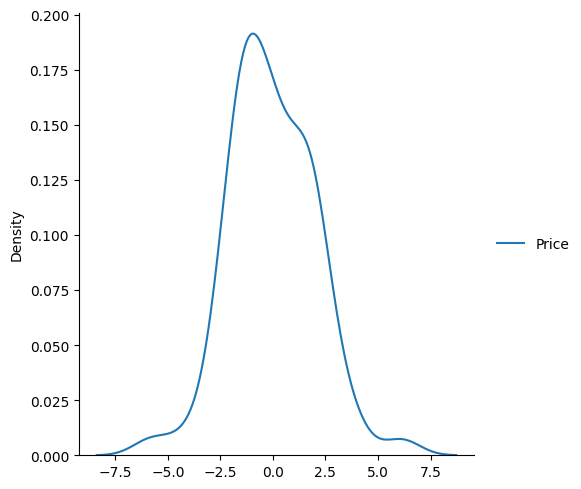

In [36]:
sns.displot(residuals,kind="kde")

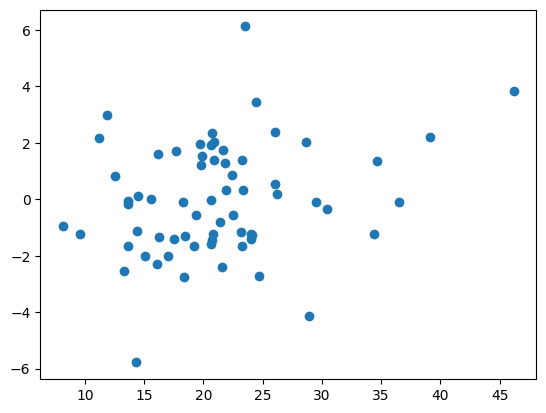

In [37]:
plt.scatter(GBR_model_pred, residuals)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(mean_absolute_error(y_test,GBR_model_pred))
print(mean_squared_error(y_test,GBR_model_pred))

1.5715450789023793
3.924576034467451


In [39]:
rscore = r2_score(y_test,GBR_model_pred)
print(rscore)

0.933072650834664


In [40]:
import pickle
filename = 'housepredict_model.sav'
pickle.dump(GBR_model, open(filename, 'wb'))

In [52]:
import pickle
import streamlit as st
from streamlit_option_menu import option_menu


# loading the saved models
house_model = pickle.load(open('housepredict_model.sav', 'rb'))

# page title
st.title('Boston House Predictive Framework')
    
    
# getting the input data from the user
col1, col2, col3 = st.columns(3)
    
with col1:
  CRIM = st.text_input('Per Capita Crime Rate')
        
with col2:
  ZN = st.text_input('Land Zone')
    
with col3:
  INDUS = st.text_input('Non-Retail Business Acres')
    
with col1:
  CHAS = st.text_input('Charles River Variable')
    
with col2:
  NOX = st.text_input('Nitric Oxide Concentration')
    
with col3:
  RM = st.text_input('Average number of Rooms')
    
with col1:
  AGE = st.text_input('Proportion of owner-occupied units')

with col2:
  DIS = st.text_input('Distances to Boston Employment Centres')

with col3:
  RAD = st.text_input(' Index Accessibility to Highways')

with col1:
  TAX = st.text_input('Property Tax Rate')

with col2:
  PTRATIO = st.text_input('Student Teacher Ration')

with col3:
  B = st.text_input('Prop African American descent')

with col1:
  LSTAT = st.text_input('Percentage of Lower Status of the Population')

with col2:
  DiabetesPedigreeFunction = st.text_input('Diabetes Pedigree Function value')

    
    
# code for Prediction
house_pred = ''
# creating a button for Prediction

if st.button('House Price Prediction Result'):
    House_prediction = house_model.predict([[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]])      
st.write(house_pred)

In [43]:
!pip install streamlit 
!pip install streamlit_option_menu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=02676ee9b4a52302289e57982475ea164672d5dbfd22e42686dfdcb465d31154
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/